## Loading Data
First of all, I'd like to load the data I'll be working on. I need to check:

- Is something missing ?
- Are there wrong values ?
- What I'm going to do with Nan values ?

In this case I'm replacing the NaN values with zeros.

In [1]:
import pandas as pd

food = pd.read_csv('food.csv', sep=';').fillna(0)
food.head()

,ID,NAME,BRAND ID,BRAND,GROUP ID,GROUP NAME,SUBGROUP ID,SUBGROUP NAME,SPECIAL,TRAFFICLIGHT VALUE,PYRAMID VALUE,CARBS,SUGAR,ENERGY,PROTEINS,SATURATED FAT,FAT,SALT,SODIUM,FIBER
0,891,Aceitunas negras sin hueso,76,Ybarra,8,Frutas,24,Procesados,No,3,2A,0.0,0.0,129.0,0.50,2.2,13.0,1.50,0.600,0.0
1,848,Acelgas,78,Verdifresh,9,Verduras y hortalizas,24,Procesados,No,1,2A,3.7,0.0,21.0,1.68,0.0,0.2,0.53,0.000,1.6
2,1118,Acelgas,70,Florette,9,Verduras y hortalizas,24,Procesados,No,1,2A,2.1,1.1,21.0,1.80,0.0,0.2,0.53,0.000,1.6
3,2856,Acelgas primera al natural,150,Helio's,9,Verduras y hortalizas,12,Conserva,No,1,2A,4.5,3.5,25.0,1.20,0.0,0.0,0.20,0.080,1.0
4,2903,Acelgas troceadas calidad extra,130,Gvtarra,9,Verduras y hortalizas,12,Conserva,No,3,2A,1.2,0.0,12.0,0.90,0.0,0.0,0.88,0.352,1.7


## Getting ONLY potential-feature columns
I need to look for those values that could make a difference when trying to classify a new product. I need to look for values that will help me to cluster new products into the three possible values of the health traffic-light.

In [2]:
COLUMNS_OF_INTEREST = [
    "TRAFFICLIGHT VALUE",
    "CARBS",
    "SUGAR",
    "ENERGY",
    "PROTEINS",
    "SATURATED FAT",
    "FAT",
    "SODIUM",
    "FIBER",
    "SALT"
]

df = (food
    .copy()
    .loc[:, COLUMNS_OF_INTEREST]
    .dropna())

df.head()

,TRAFFICLIGHT VALUE,CARBS,SUGAR,ENERGY,PROTEINS,SATURATED FAT,FAT,SODIUM,FIBER,SALT
0,3,0.0,0.0,129.0,0.50,2.2,13.0,0.600,0.0,1.50
1,1,3.7,0.0,21.0,1.68,0.0,0.2,0.000,1.6,0.53
2,1,2.1,1.1,21.0,1.80,0.0,0.2,0.000,1.6,0.53
3,1,4.5,3.5,25.0,1.20,0.0,0.0,0.080,1.0,0.20
4,3,1.2,0.0,12.0,0.90,0.0,0.0,0.352,1.7,0.88


## Creating training and test datasets
The goal is to choose the minimum set of features that maximizes the classification. Too many is will classify well but it would become too hard to use, too few would not classify well enough. I need to find the balance between the two. You can see how I've commented some sets of features that were not so representative.

In [3]:
from sklearn.model_selection import train_test_split

#feats = df[['CARBS', 'SUGAR', 'PROTEINS', 'FAT', 'SATURATED FAT', 'SALT', 'FIBER']] # 0.9075
# feats = df[['CARBS', 'SUGAR', 'PROTEINS', 'FAT', 'SALT', 'FIBER']] # 0.9
# feats = df[['CARBS', 'SUGAR', 'PROTEINS', 'FAT', 'SALT']] # 0.89125
# feats = df[['CARBS', 'PROTEINS', 'FAT', 'SALT', 'FIBER']] # 0.885
# feats = df[['SUGAR', 'PROTEINS', 'FAT', 'SALT', 'FIBER']] # 0.883
feats = df[['CARBS', 'SUGAR', 'PROTEINS', 'FAT', 'SALT', 'FIBER']]
label = df['TRAFFICLIGHT VALUE']

X_train, X_test, y_train, y_test = train_test_split(feats, label, random_state=0)

## Visualizing feature matrix
The scatter matrix sometimes could be used to visualize which pair of features is most useful to classify the training dataset. It could help you to narrow down the number of features needed.

<Figure size 432x288 with 0 Axes>

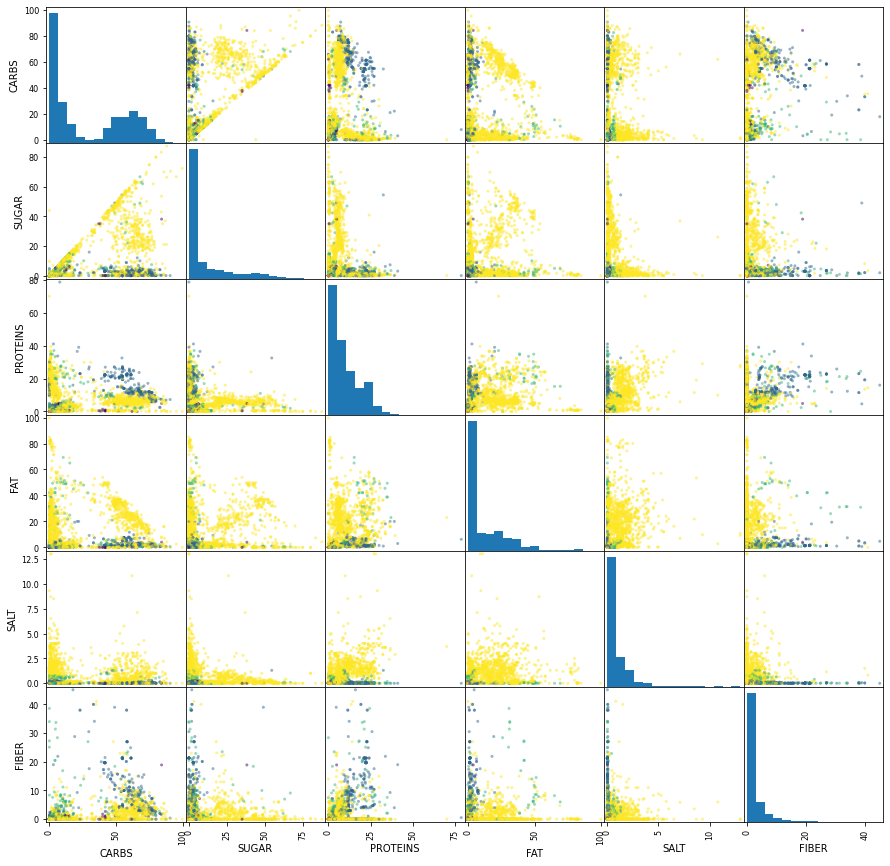

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(X_train, c=y_train,hist_kwds={'bins': 15}, figsize=(15, 15))
plt.show()

## Creating and training and evaluating the model
One of the algorithms that can be used in **Supervised Learning** is a **KNeighborsClassifier**. It will try to establish to which type the element belongs by checking the closest neighborg elements around. You can customize the **K** parameter which sets how many neighborgs does the algorithm have to check before emmiting its veredict.

Here I'm initializing the algorithm with **K=5**. Then I'm training the model (fit(...)) and finally I'm checking how well the model is going to perform by passing the testing dataset to the algorithm.

After some tunes here and there I was able to get a 90% of accuracy by using 6 features.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9

## Model prediction
To get a prediction I need to provide the following measurements:

- CARBS
- SUGAR
- PROTEINS
- FAT
- SALT
- FIBER

In [6]:
tuna_olive_oil = [0, 0, 20, 33, 0.88, 0]    # expected 3
beer_one_liter = [3.4, 0.1, 0.3, 0, 0, 0]   # expected 2
coke           = [10.6, 10.6, 0, 0, 0, 0]   # expected 3
croissants     = [46, 4.5, 8.7, 26, 1.3, 0] # expected 3
predictions    = knn.predict([
    tuna_olive_oil,
    beer_one_liter,
    coke,
    croissants
])

predictions == [3, 2, 3, 3]

array([ True,  True,  True,  True])